# Graph Mechanics


This notebook concerns the use primarily of NetworkX in working with graphs.

In [2]:
import sys, time                       # can be used to halt programs that run long
import numpy as np                     # linear algebra
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
from random import random, randint     # method random(): uniform distribution on (0, 1)
from math import sin, cos, pi, sqrt
from numpy import zeros
import numpy.linalg

import warnings; warnings.simplefilter('ignore')

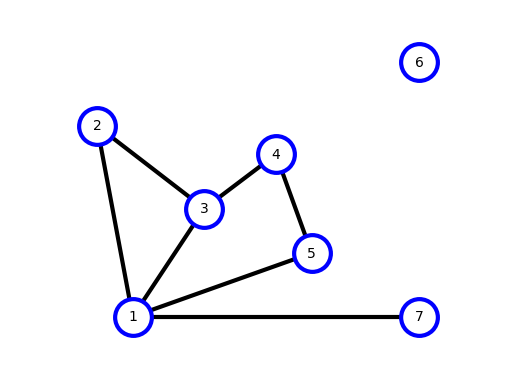

In [3]:
# Here is a quick introduction to the NetworkX graph formalism: nodes and edges

G = nx.Graph()        # empty graph

G.add_edge(1, 2)      # implicitly adds two vertices / nodes
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(1, 7)

G.add_node(6)

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.1), 6: (8, .4), 7: (8, 0.0)}

options = {
    "font_size": 10,
    "node_size": 700,
    "node_color": "white",
    "edgecolors": "blue",
    "linewidths": 3,
    "width": 3,
}

nx.draw_networkx(G, pos, **options)

ax = plt.gca()            # get current axes
ax.margins(0.20)          # set margins so as not to clip nodes
plt.axis("off")
plt.show()

In [4]:
# A random geometric graph creates:
#   N vertices distributed in the unit square
#   E edges based on a proximity (distance) threshold
N = 20
threshold = 0.4
G = nx.random_geometric_graph(N, threshold)

# position is stored as node attribute data for random_geometric_graph
#   A dictionary of 2-D coordinates for each node
pos = nx.get_node_attributes(G, 'pos')

### Some NetworkX exposition

- `print(pos)` shows `pos` is a dictionary. Keys are integer indices `0, 1, ..., N-1`. 
- value = list of two coordinates [x, y] for this node.
    - Example: `{0: [0.27089, 0.82335], 1: [0.82575, 0.71367]`, etcetera
- `nx.single_source_shortest_path_length(G, 19)`
    - is a bit mysterious: returns a dictionary with key = node index and value
0, 1, 2, 3; indicating quantized distance? { 10: 0, 0: 1, etc
- The next code block selects the center-most node and sorts all nodes by proximity:

```
# find node nearest center of the unit square
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5)**2 + (y - 0.5)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))
```

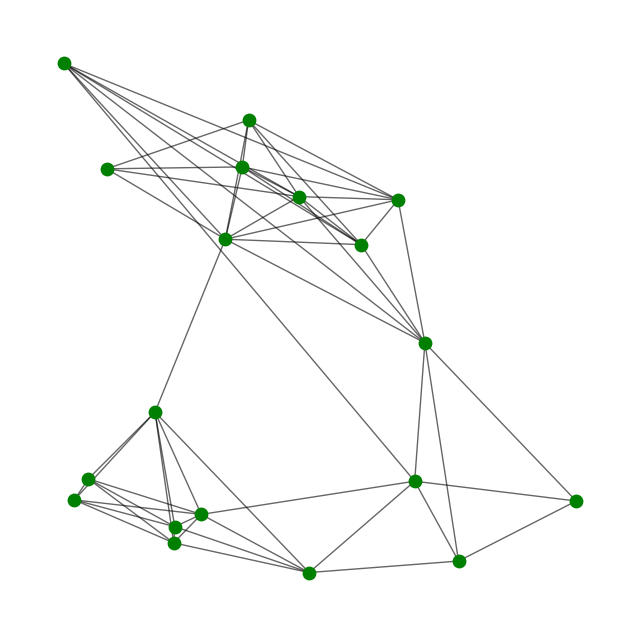

In [5]:
pos[0] = [0., 1.]

plt.figure(figsize=(8, 8))
ncenter = 0                                                     # simply take the first node
p = dict(nx.single_source_shortest_path_length(G, ncenter))     # artifact: too complicated
nx.draw_networkx_edges(G, pos, nodelist=[ncenter], alpha=0.6)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                       node_size=80,
                       node_color = 'green', # node_color=list(p.values()),
                       cmap=plt.cm.Reds_r)

# Two unused methods to keep the drawing from clipping:

# plt.xlim(-0.05, 1.05)
# plt.ylim(-0.05, 1.05)

# ax = plt.gca()            # get current axes
# ax.margins(0.20)          # set margins so as not to clip nodes

plt.axis('off')
plt.show()

improvising ring positions


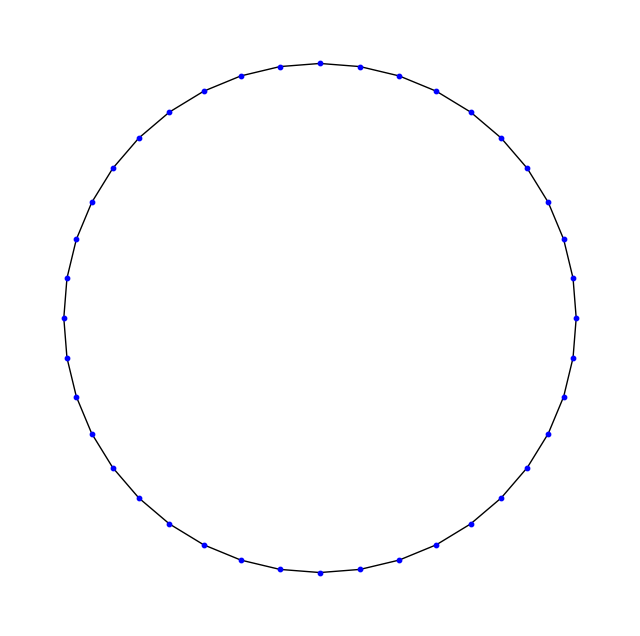

In [6]:
# star graph checks out: e = 0, 1, 1, 1, 1, ..., 1, 1, 2
# G = nx.Graph()
# for i in range(1,50): G.add_edge(0,i)

# Path Pn checks out: 1 - cos (pi * k/(n-1))
# n, G = 8, nx.Graph()
# for i in range(n-1): G.add_edge(i, i+1)

# Cycle Cn checks out: 1 - cos (2 * pi * k/n)
# n, G = 8, nx.Graph()
# for i in range(n-1): G.add_edge(i, i+1)
# G.add_edge(0, n-1)

# WARNING hypercubes are different from other graphs, key-wise
# ncube Qn checks out: 2k/n with multiplicity n-choose-k
#                      (4 choose k goes 1, 4, 6, 4, 1)
#                      Expect 1 zero, 4 0.5, 6 1.0, 4 1.5, 1 2.0 
# Version 1:
# G = nx.Graph(); G.add_edge(0, 1); ... ; G.add_edge(14, 15) (take your time)
#
# Versions 2:
# G = nx.hypercube_graph(1)

def ShowGraph(G, color):
    pos = nx.get_node_attributes(G, 'pos')
    N = G.number_of_nodes()
    if len(pos) < N: 
        print('improvising ring positions')
        pos = {}
        for i in range(0, N):
            this_angle = i * 2 * pi / N
            pos[i] = np.array([0.5 + 0.4*sin(this_angle), 0.5 + 0.4*cos(this_angle)])      
    ncenter = 0                                                     # simply take the first node
    plt.figure(figsize=(8, 8))
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_nodes(G, pos, node_size=10, node_color = color)
    plt.axis('off')
    plt.show()

# star
# G = nx.Graph()
# for i in range(1,50): G.add_edge(0,i)
n, G = 40, nx.Graph()
for i in range(n-1): G.add_edge(i, i+1)
G.add_edge(0, n-1)

ShowGraph(G, 'blue')

In [7]:
print(nx.number_connected_components(G))
print(nx.is_eulerian(G))
print(nx.is_planar(G))
print(nx.node_connectivity(G))

1
True
True
2


In [ ]:
import inspect

if False: dir(nx)

print(inspect.getdoc(numpy.linalg.eig))
print(inspect.getdoc(nx.random_graphs.erdos_renyi_graph))
print(inspect.getdoc(nx.draw))